In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.collections import LineCollection

from scipy.fftpack import fft, ifft, fftfreq

# Question 1

In [2]:
# Set up the spatial grid
Nx = 128
Lx = 2 * np.pi
dx = Lx / Nx

x = np.arange( dx/2, Lx, dx )

In [3]:
# Get the wavenumbers
kx = 2 * np.pi * fftfreq(Nx, d = dx)

In [4]:
y = np.sin(x)

# Compute the derivative
#   we inclue the .real at the end
#   to remove imaginary components that come
#   from rounding error / machine precision etc
# Note that 1j is the python notation for the imaginary unit

dydx_spectral = ifft( (1j * kx) * fft(y) ).real
dydx_true = np.cos(x)
dydx2_spectral = ifft( ((1j * kx) ** 2 * fft(y)) ).real
dydx2_true = - np.sin(x)
dydx3_spectral = ifft( (1j * kx) ** 3 * fft(y) ).real
dydx3_true = - np.cos(x)
dydx4_spectral = ifft( (1j * kx) ** 4 * fft(y) ).real
dydx4_true = np.sin(x)

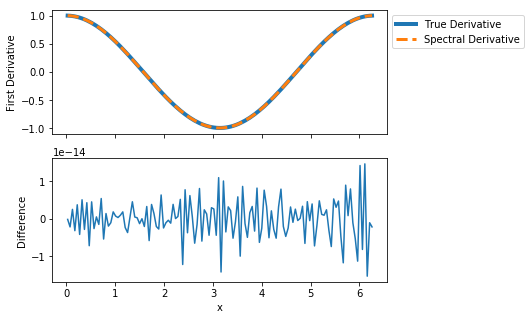

In [5]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize = (6, 5))

axes[0].plot( x, dydx_true,           linewidth = 4, label = 'True Derivative' )
axes[0].plot( x, dydx_spectral, '--', linewidth = 3, label = 'Spectral Derivative' )

axes[1].plot( x, dydx_true - dydx_spectral )


axes[1].set_xlabel('x')
axes[0].set_ylabel('First Derivative')
axes[1].set_ylabel('Difference')

axes[0].legend(loc = 'upper left', bbox_to_anchor = (1,0,0.15,1))

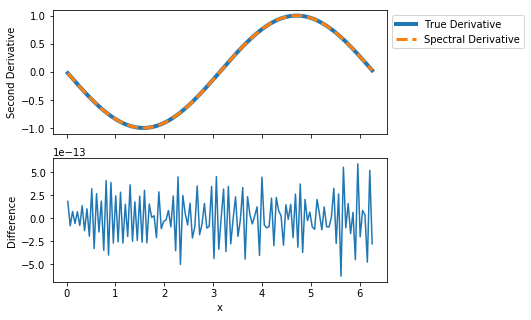

In [6]:
figfig, axes = plt.subplots(2, 1, sharex=True, figsize = (6, 5))

axes[0].plot( x, dydx2_true,           linewidth = 4, label = 'True Derivative' )
axes[0].plot( x, dydx2_spectral, '--', linewidth = 3, label = 'Spectral Derivative' )

axes[1].plot( x, dydx2_true - dydx2_spectral )

axes[1].set_xlabel('x')
axes[0].set_ylabel('Second Derivative')
axes[1].set_ylabel('Difference')

axes[0].legend(loc = 'upper left', bbox_to_anchor = (1,0,0.15,1))

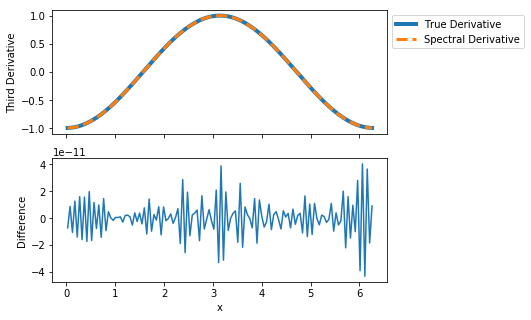

In [7]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize = (6, 5))

axes[0].plot( x, dydx3_true,           linewidth = 4, label = 'True Derivative' )
axes[0].plot( x, dydx3_spectral, '--', linewidth = 3, label = 'Spectral Derivative' )

axes[1].plot( x, dydx3_true - dydx3_spectral )

axes[1].set_xlabel('x')
axes[0].set_ylabel('Third Derivative')
axes[1].set_ylabel('Difference')

axes[0].legend(loc = 'upper left', bbox_to_anchor = (1,0,0.15,1))

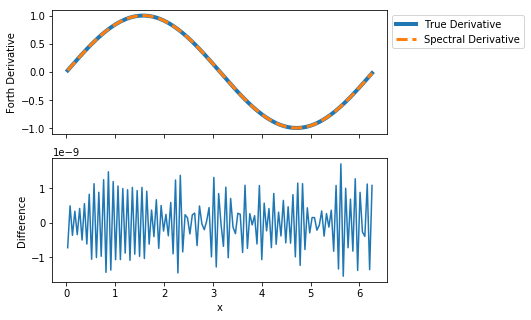

In [8]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize = (6, 5))

axes[0].plot( x, dydx4_true,           linewidth = 4, label = 'True Derivative' )
axes[0].plot( x, dydx4_spectral, '--', linewidth = 3, label = 'Spectral Derivative' )

axes[1].plot( x, dydx4_true - dydx4_spectral )

axes[1].set_xlabel('x')
axes[0].set_ylabel('Forth Derivative')
axes[1].set_ylabel('Difference')

axes[0].legend(loc = 'upper left', bbox_to_anchor = (1,0,0.15,1))

TypeError: 'AxesSubplot' object is not iterable

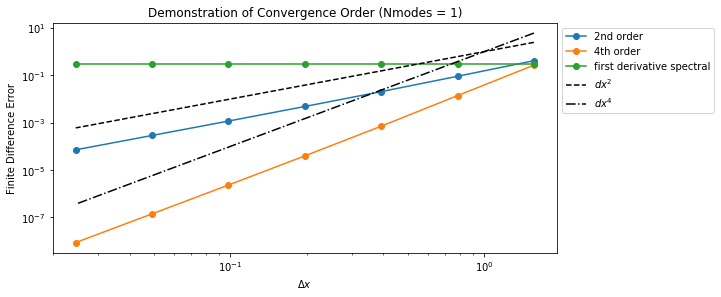

In [9]:
Nmodes = 1

def f(x):
    return np.sin(Nmodes * x)

def f_prime(x):
    return np.cos(Nmodes * x) * Nmodes

Lx = 2*np.pi
Nxs = np.power(2, np.arange(2, 9)) 

# Create some arrays to store the error values
err_2 = np.zeros(Nxs.shape)
err_4 = np.zeros(Nxs.shape)
err_s = np.zeros(Nxs.shape)


# Create 
gridspec_props = dict(wspace = 0.05, hspace = 0.5, left = 0.1, right = 0.8, bottom = 0.1, top = 0.9)
fig, axes = plt.subplots(1, 1, figsize=(10,4), gridspec_kw = gridspec_props)

for Nx, ind in zip(Nxs, range(len(Nxs))):
    
    # Grid with chosen resolution
    x  = np.linspace(0, Lx, Nx)[:-1] # only spits out three values

    Delta_x = x[1] - x[0]
    dx = Lx/Nx
    # Function to differentiation
    y  = f(x)

    # True derivative
    yp = f_prime(x)
    
    kx = (2 * np.pi*fftfreq(Nx,d = 1.05*dx))[:-1] ### added
    dydx_spectral = ifft( ((1j *kx) * fft(y) )).real 
    
    # Compute the numerical derivatives
    Ord2 = (                      np.roll(y, -1) -   np.roll(y, 1)                 ) / ( 2*Delta_x)
    Ord4 = ( - np.roll(y, -2) + 8*np.roll(y, -1) - 8*np.roll(y, 1) + np.roll(y, 2) ) / (12*Delta_x)
    
    # Store the error in the derivatives
    err_2[ind] = np.sqrt(np.mean( (Ord2 - yp)**2 ))
    err_4[ind] = np.sqrt(np.mean( (Ord4 - yp)**2 ))
    err_s[ind] = np.sqrt(np.mean( (dydx_spectral - yp)**2 ))
    
    
plt.plot(Lx/Nxs, err_2, '-o', label='2nd order')
plt.plot(Lx/Nxs, err_4, '-o', label='4th order')
plt.plot(Lx/Nxs, err_s, '-o', label='first derivative spectral')
plt.plot(Lx/Nxs, (Lx/Nxs)**2, '--k', label='$dx^2$')
plt.plot(Lx/Nxs, (Lx/Nxs)**4, '-.k', label='$dx^4$')


plt.legend(bbox_to_anchor=(1., 0, 0.25, 1))
plt.xlabel('$\Delta x$')
plt.ylabel('Finite Difference Error')
plt.xscale('log')
plt.yscale('log')
plt.title('Demonstration of Convergence Order (Nmodes = 1)')

for ax in axes:
    ax.grid(True)
    
axes[1].legend(bbox_to_anchor=(1., -1, 0.25, 2))

TypeError: 'AxesSubplot' object is not iterable

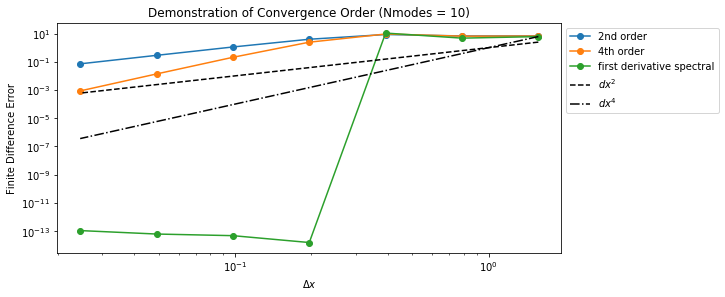

In [10]:
Nmodes = 10
def f(x):
    return np.sin(Nmodes * x)

def f_prime(x):
    return np.cos(Nmodes * x) * Nmodes

Lx = 2*np.pi
Nxs = np.power(2, np.arange(2, 9)) 

# Create some arrays to store the error values
err_2 = np.zeros(Nxs.shape)
err_4 = np.zeros(Nxs.shape)
err_s = np.zeros(Nxs.shape)


# Create 
gridspec_props = dict(wspace = 0.05, hspace = 0.5, left = 0.1, right = 0.8, bottom = 0.1, top = 0.9)
fig, axes = plt.subplots(1, 1, figsize=(10,4), gridspec_kw = gridspec_props)

for Nx, ind in zip(Nxs, range(len(Nxs))):
    
    # Grid with chosen resolution
    x  = np.linspace(0, Lx, Nx)[:-1] # only spits out three values

    Delta_x = x[1] - x[0]
    dx = Lx/Nx
    # Function to differentiation
    y  = f(x)

    # True derivative
    yp = f_prime(x)
    
    kx = (2 * np.pi*fftfreq(Nx,d = 1.05*dx))[:-1] ### added
    dydx_spectral = ifft( ((1j *kx) * fft(y) )).real 
    
    # Compute the numerical derivatives
    Ord2 = (                      np.roll(y, -1) -   np.roll(y, 1)                 ) / ( 2*Delta_x)
    Ord4 = ( - np.roll(y, -2) + 8*np.roll(y, -1) - 8*np.roll(y, 1) + np.roll(y, 2) ) / (12*Delta_x)
    
    # Store the error in the derivatives
    err_2[ind] = np.sqrt(np.mean( (Ord2 - yp)**2 ))
    err_4[ind] = np.sqrt(np.mean( (Ord4 - yp)**2 ))
    err_s[ind] = np.sqrt(np.mean( (dydx_spectral - yp)**2 ))
    
    
plt.plot(Lx/Nxs, err_2, '-o', label='2nd order')
plt.plot(Lx/Nxs, err_4, '-o', label='4th order')
plt.plot(Lx/Nxs, err_s, '-o', label='first derivative spectral')
plt.plot(Lx/Nxs, (Lx/Nxs)**2, '--k', label='$dx^2$')
plt.plot(Lx/Nxs, (Lx/Nxs)**4, '-.k', label='$dx^4$')


plt.legend(bbox_to_anchor=(1., 0, 0.25, 1))
plt.xlabel('$\Delta x$')
plt.ylabel('Finite Difference Error')
plt.xscale('log')
plt.yscale('log')
plt.title('Demonstration of Convergence Order (Nmodes = 10)')

for ax in axes:
    ax.grid(True)
    
axes[1].legend(bbox_to_anchor=(1., -1, 0.25, 2))

# Question2

In [11]:
# Set up the grids
Nx = 512
Lx = 30
dx = Lx / Nx

x = np.arange( dx/2, Lx, dx ) - Lx / 2

kx = 2 * np.pi * fftfreq(Nx, d = dx)

In [13]:
y1 = np.exp( -x**2 )
y1_hat = fft(y1)
y2= np.tanh( 5 - np.abs(x))
y2_hat = fft(y2)
y3 = np.cos( np.pi * (x / 2) ** 2 )
y3_hat = fft(y3)

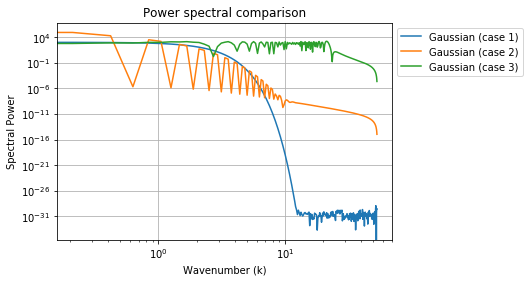

In [14]:
plt.figure( figsize=(6,4) )

plt.plot( kx[:Nx//2], np.abs(y1_hat[:Nx//2])**2, label = 'Gaussian (case 1)' )
plt.plot( kx[:Nx//2], np.abs(y2_hat[:Nx//2])**2, label = 'Gaussian (case 2)' )
plt.plot( kx[:Nx//2], np.abs(y3_hat[:Nx//2])**2, label = 'Gaussian (case 3)' )

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Wavenumber (k)')
plt.ylabel('Spectral Power')
plt.title('Power spectral comparison')
plt.grid(True)

plt.legend( loc = 'upper left', bbox_to_anchor = (1, 0, 0.15, 1) )

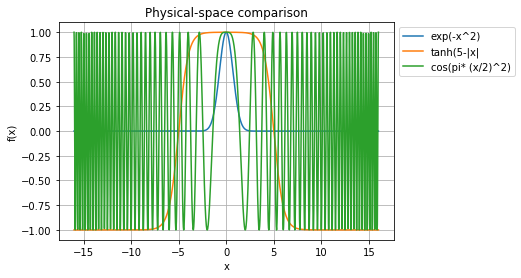

In [15]:
x = np.linspace(-16,16,2000)

plt.figure( figsize=(6,4) )
plt.plot( x, np.exp(- x ** 2), label = "exp(-x^2)" )
plt.plot( x, np.tanh( 5 - np.abs(x)), label = "tanh(5-|x|" )
plt.plot( x, np.cos( np.pi * (x / 2) ** 2 ), label = "cos(pi* (x/2)^2)" )
#plt.yscale('log')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Physical-space comparison')
plt.grid(True)
plt.legend( loc = 'upper left', bbox_to_anchor = (1, 0, 0.15, 1) )

# Question 3

The data has 400 time points and 512 space points.
The viscous coefficient nu is 1


Text(0.5, 1.0, 'Physical-Space Solution')

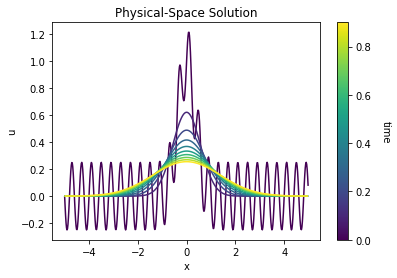

In [16]:
# First, we need to load in the data
heat_data = np.load('heat.npz')

time = heat_data['time']         # The temporal grid
x    = heat_data['x']            # The spatial grid
u    = heat_data['u']            # The solution (first axis is time, second is space)
kx   = heat_data['kx']           # The wavenumbers relevant to the grid
nu   = float(heat_data['nu'])    # The viscosity coefficient

Nt, Nx = u.shape

print('The data has {0:d} time points and {1:d} space points.'.format(Nt, Nx))
print('The viscous coefficient nu is {0:g}'.format(nu))


# In[10]:


fig, ax = plt.subplots(1, 1, figsize = (6,4))

plot_inds = np.arange(0, 400, 40)

# Select out the data that we want to use for creating lines
u_lines = [np.column_stack([x, u[ii,:]]) for ii in plot_inds]


# Create a LineCollection object which holds them together
u_segments = LineCollection(u_lines, cmap = matplotlib.cm.viridis)
       
 # Set which variable is used with the colour map (determines colours)
u_segments.set_array(time[plot_inds])
    
# Plot the lines
ax.add_collection(u_segments)

# Need to manually update the bounds
ax.axis('tight')

# Add a colour bar showing time
cbar = plt.colorbar(u_segments, ax = ax)
cbar.ax.set_ylabel('time', rotation = -90, labelpad = 20)

ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Physical-Space Solution')

In [17]:
Nx = 512
Lx = 10
dx = Lx / Nx

x = np.arange( dx/2, Lx, dx ) - Lx / 2

kx = 2 * np.pi * fftfreq(Nx, d = dx)

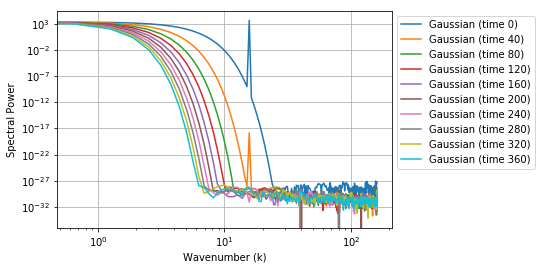

In [18]:
for i in plot_inds:
    y_hat = fft(u[i,:])
    plt.plot(kx[:Nx//2], np.abs(y_hat[:Nx//2])**2, label = 'Gaussian (time {0})'.format(i))
    ax.axis('tight')
plt.xscale('log')
plt.yscale('log')

plt.xlabel('Wavenumber (k)')
plt.ylabel('Spectral Power')

plt.grid(True)

plt.legend( loc = 'upper left', bbox_to_anchor = (1, 0, 0.15, 1))

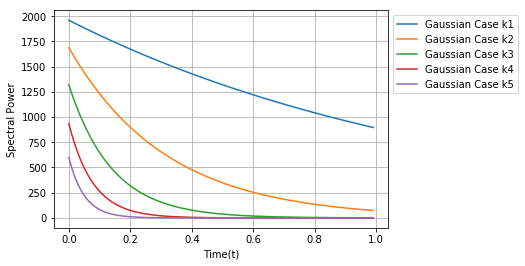

In [19]:
u_k1=[]
u_k2=[]
u_k3=[]
u_k4=[]
u_k5=[]
time=[]
dt=np.arange(0,400,4)
#assign values to each list according to Kn number
for i in dt:
    y= u[i,:]
    y_hat = fft(y)
    index= np.int(i/4)
    #print(type(index),index)
    u_k1.append(np.abs(y_hat[1])**2)
    time.append(np.float(i/400))
for i in dt:
    y= u[i,:]
    y_hat = fft(y)
    index= np.int(i/4)
    #print(type(index),index)
    u_k2.append(np.abs(y_hat[2])**2)
for i in dt:
    y= u[i,:]
    y_hat = fft(y)
    index= np.int(i/4)
    #print(type(index),index)
    u_k3.append(np.abs(y_hat[3])**2) 
for i in dt:
    y= u[i,:]
    y_hat = fft(y)
    index= np.int(i/4)
    #print(type(index),index)
    u_k4.append(np.abs(y_hat[4])**2)
for i in dt:
    y= u[i,:]
    y_hat = fft(y)
    index= np.int(i/4)
    #print(type(index),index)
    u_k5.append(np.abs(y_hat[5])**2) 
#Set up the Plot of Spectal 
plt.figure( figsize=(6,4) )
plt.plot(time[:] ,u_k1[:] , label = 'Gaussian Case k1')
plt.plot(time[:] ,u_k2[:] , label = 'Gaussian Case k2')
plt.plot(time[:] ,u_k3[:] , label = 'Gaussian Case k3')
plt.plot(time[:] ,u_k4[:] , label = 'Gaussian Case k4')
plt.plot(time[:] ,u_k5[:] , label = 'Gaussian Case k5')
plt.xlabel('Time(t)')
plt.ylabel('Spectral Power')

plt.grid(True)

plt.legend( loc = 'upper left', bbox_to_anchor = (1, 0, 0.15, 1) )

# Question 4

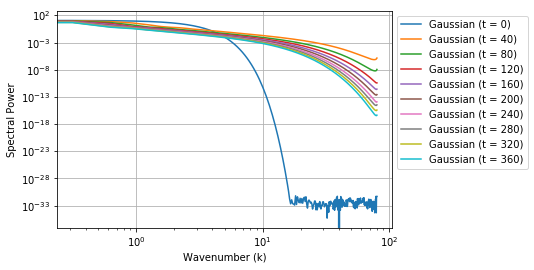

In [20]:
heat_data = np.load('Burgers.npz')


time = heat_data['time']  # The temporal grid
x = heat_data['x']  # The spatial grid
u = heat_data['u']  # The solution (first axis is time, second is space)
kx = heat_data['kx']  # The wavenumbers relevant to the grid
nu = float(heat_data['nu'])  # The viscosity coefficient
Nt, Nx = u.shape

plot_inds = np.arange(0, 400, 40)

u0 = u[0, :]
u0_hat = fft(u0)
u1 = u[40, :]
u1_hat = fft(u1)
u2 = u[80, :]
u2_hat = fft(u2)
u3 = u[120, :]
u3_hat = fft(u3)
u4 = u[160, :]
u4_hat = fft(u4)
u5 = u[200, :]
u5_hat = fft(u5)
u6 = u[240, :]
u6_hat = fft(u6)
u7 = u[280, :]
u7_hat = fft(u7)
u8 = u[320, :]
u8_hat = fft(u8)
u9 = u[360, :]
u9_hat = fft(u9)


plt.figure(figsize=(6, 4))

plt.plot(kx[:Nx // 2], np.abs(u0_hat[:Nx // 2]) ** 2, label='Gaussian (t = 0)')
plt.plot(kx[:Nx // 2], np.abs(u1_hat[:Nx // 2]) ** 2, label='Gaussian (t = 40)')
plt.plot(kx[:Nx // 2], np.abs(u2_hat[:Nx // 2]) ** 2, label='Gaussian (t = 80)')
plt.plot(kx[:Nx // 2], np.abs(u3_hat[:Nx // 2]) ** 2, label='Gaussian (t = 120)')
plt.plot(kx[:Nx // 2], np.abs(u4_hat[:Nx // 2]) ** 2, label='Gaussian (t = 160)')
plt.plot(kx[:Nx // 2], np.abs(u5_hat[:Nx // 2]) ** 2, label='Gaussian (t = 200)')
plt.plot(kx[:Nx // 2], np.abs(u6_hat[:Nx // 2]) ** 2, label='Gaussian (t = 240)')
plt.plot(kx[:Nx // 2], np.abs(u7_hat[:Nx // 2]) ** 2, label='Gaussian (t = 280)')
plt.plot(kx[:Nx // 2], np.abs(u8_hat[:Nx // 2]) ** 2, label='Gaussian (t = 320)')
plt.plot(kx[:Nx // 2], np.abs(u9_hat[:Nx // 2]) ** 2, label='Gaussian (t = 360)')


plt.xscale('log')
plt.yscale('log')

plt.xlabel('Wavenumber (k)')
plt.ylabel('Spectral Power')

plt.grid(True)

plt.legend(loc='upper left', bbox_to_anchor=(1, 0, 0.15, 1))

The data has 400 time points and 512 space points.
The viscous coefficient nu is 0.00078125


Text(0.5, 1.0, 'Physical-Space Solution')

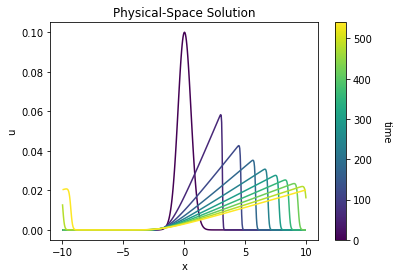

In [21]:
print('The data has {0:d} time points and {1:d} space points.'.format(Nt, Nx))
print('The viscous coefficient nu is {0:g}'.format(nu))

fig, ax = plt.subplots(1, 1, figsize=(6, 4))

plot_inds = np.arange(0, 400, 40)

# Select out the data that we want to use for creating lines
u_lines = [np.column_stack([x, u[ii, :]]) for ii in plot_inds]

# Create a LineCollection object which holds them together
u_segments = LineCollection(u_lines, cmap=matplotlib.cm.viridis)

# Set which variable is used with the colour map (determines colours)
u_segments.set_array(time[plot_inds])

# Plot the lines
ax.add_collection(u_segments)

# Need to manually update the bounds
ax.axis('tight')

# Add a colour bar showing time
cbar = plt.colorbar(u_segments, ax=ax)
cbar.ax.set_ylabel('time', rotation=-90, labelpad=20)

ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Physical-Space Solution')